# 线性代数模型

### 背景
-  线性代数作为一门重要的数学工具，不仅在数学各领域有重要的理论意义，不在物理、生物、化学、医学、生产管理等各方面有着广泛而重要的应用。作为教学建模来说，掌握基本的线性代数方法也是必要的。
- 本次课程主要结合一些实际问题说明如何建立线性代数模型，并利用软件工具进行辅助分析求解。
- 首先以简单的案例介绍线性代数模型，其主要目的是通过这些案例加深对线性代数基本概念、相论和方法的理解，培养数学建模的意识。
- 以矩阵分解方法在推荐系统中的应用为例，介绍线性代数在信息专业中的几个典型应用。

## 1. python线性代数工具简介
python当中有着跟`matlab`功能相同的线性代数包`numpy`、`scipy`和`sympy`，功能十分强大，可以满足日常线性代数需求。考虑下面例子:
- 符号行列式的计算
- 线性方程组的求解
- 特征值和特征向量的计算

In [1]:
import sympy as sp
import numpy as np
import scipy as spy
import numpy.linalg as npl
import matplotlib.pyplot as plt

In [2]:
# 符号行列式的计算
x = sp.symbols('x')
y = sp.symbols('y')
Mat1 = sp.Matrix([[x - y, 1, 1, 1],
                  [1, x - y, 1, 1],
                  [1, 1, x + y, 1],
                  [1, 1, 1, x + y]])

det_Mat1 = Mat1.det()
print(det_Mat1)

x**4 - 2*x**2*y**2 - 6*x**2 + 8*x + y**4 + 2*y**2 - 3


In [3]:
# 解方程
x = sp.symbols('x')
Mat2 = sp.Matrix([[3, 2, 1, 1],
                  [3, 2, 2 - x**2, 1],
                  [5, 1, 3, 2],
                  [7 - x**2, 1, 3, 2]])

det_Mat2 = Mat2.det()
solutions = sp.solve(det_Mat2, x)
print(solutions)

[-1, 1, -sqrt(2), sqrt(2)]


In [4]:
# 线性方程组求解
Mat3 = sp.Matrix([[2, 1, -1, 3, 1],
                  [4, 2, -5, 1, 2],
                  [2, 1, -1, -1, 1]])
rref_Mat3, _ = Mat3.rref()
print(rref_Mat3)

Matrix([[1, 1/2, 0, 0, 1/2], [0, 0, 1, 0, 0], [0, 0, 0, 1, 0]])


In [5]:
# 特征值和特征向量的计算
Mat4 = sp.Matrix([[-1, -2, 0],
                  [2, 3, 0],
                  [2, 1, 3]])
eig_vals_Mat4 = Mat4.eigenvals()
eig_vecs_Mat4 = Mat4.eigenvects()
print("Eigenvalues: ", eig_vals_Mat4)
print("Eigenvectors: ", eig_vecs_Mat4)

Eigenvalues:  {1: 2, 3: 1}
Eigenvectors:  [(1, 2, [Matrix([
[-2],
[ 2],
[ 1]])]), (3, 1, [Matrix([
[0],
[0],
[1]])])]


## 2. 线性方程模型

例1. 投入产出模型
- 某地区有3个重要产业， 即煤矿、发电厂和地方铁路。经成本核算，开采一元的煤，煤矿要支付0.3元的电费0.25元的运输费。生产1元的电力，发电厂要支付0.65元的煤作燃料，为了运行电厂的辅助设备需消耗本身0.15元的电，还需要0.1元的运输费:作为铁路局，每创收1元的运输费， 铁路要支付0.6元的煤费及0.15元的电费。
- 在某一周内，煤矿接到金额为8万元的外地订货，发电厂接到金额为6.5万元的外地需求，外界对地方铁路没有需求，问3个企业在这一周内，总产值各多少才能满足自身及外界的需求? 3个企业间相互支付多少金额?3个企业各创造多少新价值?

- 模型建立:设煤矿、发电厂和铁路本周内的总产值依次为$x_1，x_2，x_3$元，则根据需求有如下分配平衡方程组如下所示，求解即可
$$
\left\{
    \begin{matrix}
        x_1 - (0 * x_1 + 0.65x_2 + 0.6x_3) = 80000 \\
        x_2 - (0.3x_1 + 0.15x_2 + 0.15x_3) = 65000 \\
        x_3 - (0.25x_1 + 0.1x_2 + 0 * x_3) = 0 \\
    \end{matrix}
\right.
$$

矩阵B称为完全消耗矩阵，它与矩阵A一起在各个部门之间的投入产
出中起平衡作用。矩阵C可以称为投入产出矩阵，它的元素表示煤矿、
发电厂、铁路之间的投入产出关系，其中每一行给出了每一个企业分
别用于企业内部和其他企业的消耗。向量D称为总投入向量，它的元
素是矩阵C的对应列元素之和， 分别表示煤矿、发电厂、铁路得到的
总投入


In [6]:
# 只需要求解 (E - A)X = Y即可

A = np.array([[0, 0.65, 0.6],
              [0.3, 0.15, 0.15],
              [0.25, 0.1, 0]])
Y = np.array([[80000],
              [65000],
              [0]])
E = np.eye(3)
X = np.dot(npl.inv(E - A), Y)
B = npl.inv(E - A) - E
C = np.dot(A, np.diagflat(X))
D = np.dot(np.reshape(np.ones(3), (1, 3)), C)
F = X - D.T
print(X)
print(B)
print(C)
print(D)
print(F)

[[240255.25126296]
 [174953.46982186]
 [ 77559.15979793]]
[[0.77612337 1.51023664 1.29220952]
 [0.71789418 0.80802978 0.70194097]
 [0.51582026 0.55836214 0.39324648]]
[[     0.         113719.75538421  46535.49587876]
 [ 72076.57537889  26243.02047328  11633.87396969]
 [ 60063.81281574  17495.34698219      0.        ]]
[[132140.38819463 157458.12283967  58169.36984844]]
[[108114.86306833]
 [ 17495.34698219]
 [ 19389.78994948]]


例2. 交通流量模型
- 问题背景：城市道路网中每条道路、每个交叉路口的车流量调查，是分析、评价及改善城市交通状况的基础.根据实际车流量信息可以设计流量控制方案，必要时设置单行线，以免大量车辆长时间拥堵.下面考虑一 简化的交通流量统计问题.
- 问题描述:某城市的交通图，如图所示，每条道路都是单行线，需要
调查每条道路每小时的车流量.图中的数字表示该条路段的车流数.如
果每个交叉路口进入和离开的车数相等，整个图中进入和离开的车数
相等. 试解决以下问题:
1. 建立确定每条道路流量的线性方程组.
2. 分析哪些流量数据是多余的.
3. 为了唯一确定未知流量，需要增添哪几条道路的流量统计

**具体问题的求解过程详见对应的PPT**

## 3. 矩阵分解与应用

**矩阵分解在数据处理中的应用**
- Principal Component Analysis (PCA)
  - Draw a plane closest to data points (Pearson, 1901)
  - Retain most variance of the data (Hotelling, 1933)
- Singular Value Decomposition (SVD)
  - Low-rank approximation (Eckart-Young, 1936)
  - Practical applications or Efficient Computations (GolubKahan, 1965)
- Matrix Factorization In Recommender Systems
  - “Factorization Meets the Neighborhood: a Multifaceted Collaborative Filtering Model”，by Yehuda Koren, ACM KDD 2008


### 主成分分解(PCA)

#### 主成分分解（PCA）算法的原理与假设:
- 每个样本的每个特征（Feature）取值构成样本数据矩阵。
- 样本数据矩阵的协方差矩阵的每个特征向量，即为数据的每个主成分
- 对应特征值最大的特征向量的方向，即为数据差异最大的主成分基底

#### 具体步骤：
1. 通过计算每个维度的均值，将每个样本在各个维度上的值，转换为相对质心的相对值
2. 使用变换后的矩阵，计算三个维度的协方差矩阵。
3. 计算特征值和特征向量
4. 将特征值从大到小排序，对应的特征向量也相应重排序。
5. 将原始数据，投影到降维后的特征向量上，获得新的数据矩阵

[ 2.91554641 12.12695538  9.46287155]


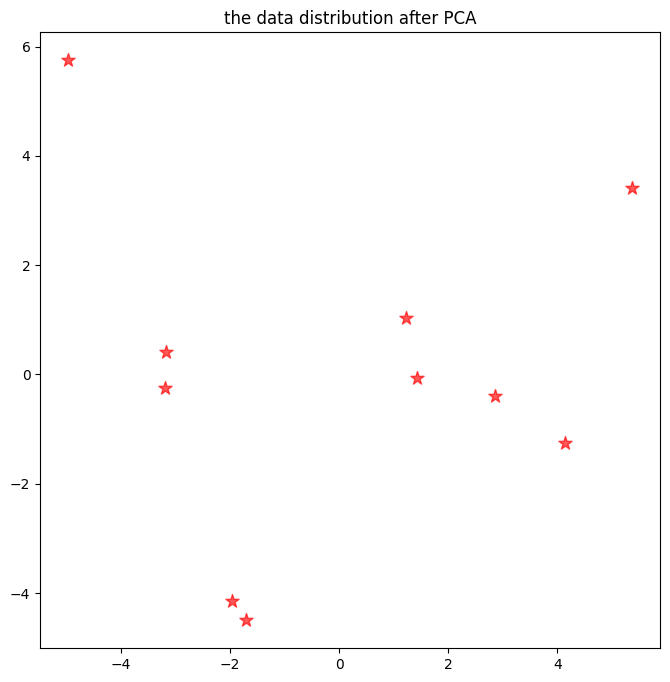

In [7]:
# PCA 计算举例

## 1. 通过计算每个维度的均值，将每个样本在各个维度上的值，转换为相对质心的相对值
origin_data = np.array([[2.5000, 9.4000, 6.5000],
                        [0.2000, 5.6000, 4.2000],
                        [6.0000, 3.2000, 0.3000],
                        [4.2000, 3.9000, 6.1000],
                        [2.3000, 5.0000, 5.2000],
                        [11.0000, 7.0000, 0.5600],
                        [2.6000, 0.3000, 0.9000],
                        [3.4000, 0.0200, 1.8100],
                        [3.3000, 6.5000, 2.1300],
                        [8.0000, 2.0000, 4.2000]])

mean_orig = np.mean(origin_data, axis=0)
trans_data = origin_data - mean_orig

## 2. 使用变换后的矩阵，计算三个维度的协方差矩阵
cov_tdata = np.cov(trans_data.T)

## 3. 计算特征值和特征向量
eig_vals_cov, eig_vecs_cov = npl.eig(cov_tdata)
print(eig_vals_cov)

## 4. 将特征值从大到小排序，对应的特征向量也相应重排序
new_VM = np.array([eig_vecs_cov.T[1], eig_vecs_cov.T[2]]).T

## 5. 将原始数据，投影到降维后的特征向量上，获得新的数据矩阵。
final_data = np.dot(trans_data, new_VM)

plt.figure(figsize=(8, 8))
plt.scatter(final_data.T[0], final_data.T[1], s=100, c='r', marker='*',alpha=0.65)
plt.title("the data distribution after PCA")
plt.show()

### 奇异值分解——Singular Value Decomposition (SVD)
- 奇异值分解也是一种数据降维的方法
- 主要用于矩阵分解
- 奇异值分解也属于一种PCA

#### 主要思想

任意一个 N × d 矩阵 X 可以按如下形式分解:
$X(N, d) = U(N, r) * \sum(r, r) * V^T(r, d)$
- r 为矩阵X的秩，即矩阵X最大的线性无关的行数或列数
- U 为一个列正交的N × r 的矩阵;
- V 为一个列正交的 d × r的矩阵;
- Σ 为一个r × r的对角阵，其中对角线元素为矩阵X的奇异值，按降序排列

$C = \frac{1}{N - 1} X^TX$

$C$的特征向量等于$X$的右奇异向量，即$V^T$ 中包含了$C$的特征向量。且$\sum$中的奇异值与$C$中的特征值的关系为
$
\lambda_i = \frac{s_i^2}{N - 1}
$

In [8]:
# 一个奇异值分解的例子

X = np.array([[1, 0, 1],
              [-1, -2, 0],
              [0, 1, -1]])
U, s, V = npl.svd(X)
C = np.dot(X.T, X) / 2

v, d = npl.eig(C)

print(d)
print(V.T)

[[-0.41526149 -0.71178541  0.5664975 ]
 [-0.90175265  0.40422217 -0.15312282]
 [ 0.12000026  0.57442663  0.80971228]]
[[-0.41526149 -0.5664975   0.71178541]
 [-0.90175265  0.15312282 -0.40422217]
 [ 0.12000026 -0.80971228 -0.57442663]]


### 奇异值分解的几何解释
给定一个对称矩阵$M$, 我们可以找到一组正交向量$v_i$ ，使得 $Mv_i$ 等于$v_i$与一个标量的乘积，即
$$
Mv_i = \lambda_iv_i
$$

其中 $\lambda_i$ 是一个标量

几何上，即表示向量 $v_i$ 与 $M$ 相乘等效于将向量拉伸缩放或180°翻转，但没有其他旋转,使用向量描述，即如果针对矩阵$M$选择合适的正交基底，基底单位向量分别为$v_1$和$v_2$, 该单位向量与$M$相乘后得到向量 $Mv_1$ 和 $Mv_2$ 仍然保持正交。

- 我们分别用向量 $u_1$ 和 $u_2$ 表示 $Mv_1$ 和 $Mv_2$ 方向上的单位向量。
- 向量 $Mv_1$ 和 $Mv_2$的长度分别记作 $\sigma_1$ 与 $\sigma_2$
- 即 $Mv_1 = \sigma_1u_1 \text{ and } Mv_2 = \sigma_2u_2 $

则对于一个向量$x$ 我们有$x = (v_1x)v_1 + (v_2x )v_2$

从而有 $M = u_1\sigma_1v_1^T + u_2\sigma_2v_2^T = U\sum V^T$

### 奇异值分解应用案例

- 数据压缩
- 噪音消除

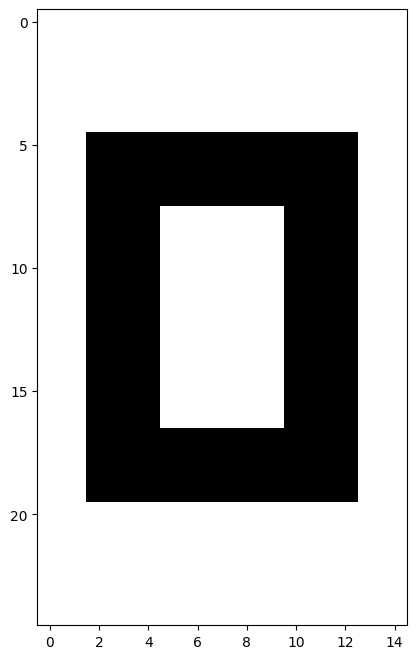

[1.47242531e+01 5.21662293e+00 3.31409370e+00 4.54869799e-16
 2.77582138e-16 1.77077681e-16 1.00587825e-31 1.89441631e-32
 1.12307145e-32 5.63270980e-33 7.42362038e-48 2.99785586e-48
 4.72972721e-49 3.10431488e-64 5.93059412e-65]
(25, 25)
(15, 15)


In [9]:
# 数据压缩
M = np.concatenate(
    (
        np.concatenate((np.ones((5, 15)),), axis=1),
        np.concatenate((np.ones((3, 2)), np.zeros((3, 11)), np.ones((3, 2))), axis=1),
        np.concatenate(
            (
                np.ones((9, 2)),
                np.zeros((9, 3)),
                np.ones((9, 5)),
                np.zeros((9, 3)),
                np.ones((9, 2)),
            ),
            axis=1,
        ),
        np.concatenate((np.ones((3, 2)), np.zeros((3, 11)), np.ones((3, 2))), axis=1),
        np.concatenate((np.ones((5, 15)),), axis=1),
    ),
    axis=0,
)
plt.axis
plt.figure(figsize=(10, 8))
plt.imshow(M, cmap='gray')
plt.show()


U, s, V = npl.svd(M)

print(s)
print(U.shape)
print(V.T.shape)


从s的结果来看，确实只有三个奇异值，则原来的矩阵可以由$(25 + 15) * 3 + 3 = 123 $个数值表示

而针对噪音消除，只是将数据用奇异分解，并且取前几个项作为组合取得近似图像即可

### 低秩矩阵分解 low rank MF

![](./MF1.png)

![](./MF2.png)

MF算法中根据预测评分和真实评分的误差更新用户和物品特征向量的过程称为梯度下降（Gradient Descent）或随机梯度下降（Stochastic Gradient Descent），是一种常见的优化算法。在MF算法中，对于每一个用户和物品，我们需要计算它们的特征向量，初始值可以随机生成，然后根据误差逐步调整特征向量的取值，直到误差最小。

下面是一个简单的Python代码示例，用于根据预测评分和真实评分的误差更新用户和物品特征向量，其中，R是真实评分矩阵，P是用户特征矩阵，Q是物品特征矩阵，K是特征数量，alpha是学习速率，beta是正则化参数。

In [10]:
def matrix_factorization(R, P, Q, K, alpha=0.0005, beta=0.05, steps=2000):
    Q = Q.T
    for step in range(steps):
        eij = R - np.dot(P, Q)
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    P[i, :] += alpha * (2 * eij[i, j] * Q[:, j].T - beta * P[i, :])
                    Q[:, j] += alpha * (2 * eij[i, j] * P[i, :].T - beta * Q[:, j])
        e = np.sum(np.square(R - np.dot(P, Q))) + beta * (np.sum(np.square(P)) + np.sum(np.square(Q)))
        if e < 0.001:
            break
    return P, Q.T



在这段代码中，首先将物品特征矩阵Q进行转置，然后使用两层循环遍历评分矩阵R，当R[i][j] > 0时，说明用户i对物品j有评分，需要根据预测评分和真实评分的误差来更新用户i和物品j的特征向量，具体来说，需要计算误差eij，然后根据梯度下降算法更新P[i]和Q[:,j]。在完成一次遍历后，计算预测评分矩阵eR和误差e，如果误差e小于0.001，则结束训练过程。最后，返回更新后的用户特征矩阵P和物品特征矩阵Q.T。

其中更新过程可以通过如下过程完成：

我们定义 $e_{ij} = r_{ij} - \hat{r}_{ij}$ 为第 $i$ 个用户对第 $j$ 个物品的真实评分与预测评分之间的误差。我们的目标是通过梯度下降算法最小化所有的 $e{ij}$ 的平方和，即最小化误差函数：

$$
min _{P,Q}\sum_{i,j}(r_{ij} - \hat{r}_{ij})^2 = min_{P,Q}\sum_{i,j}(r_{ij} - \sum_{k=1}{K}p_{ik}q_{kj})^2
$$

其中，$P$ 和 $Q$ 分别是用户和物品的特征矩阵，$K$ 是设定的特征数量。

根据梯度下降算法，我们需要对误差函数求导，得到参数的梯度，然后更新参数。对于 $p_{ik}$，我们可以采用如下的梯度更新规则：

$$
p_{i,k} \leftarrow p_{i,k} + \eta(e_{ij}q_{kj} - \lambda p_{ik}) \\
q_{k,j} \leftarrow p_{k,j} + \eta(e_{ij}q_{ik} - \lambda p_{kj})
$$

其中，$\eta$ 是学习率，$\lambda$ 是正则化参数，用于防止过拟合。对于 $q_{kj}$，我们可以采用类似的规则进行更新。

In [11]:
## 一个示例

R = np.array([[5, 3, 4],
              [0, 2, 4],
              [4, 2, 0]])
P = np.random.rand(3, 2)
Q = np.random.rand(3, 2)
P, Q = matrix_factorization(R, P, Q, 2)

R_sim= np.dot(P, Q.T)
print(R)
print(np.round(R_sim))

[[5 3 4]
 [0 2 4]
 [4 2 0]]
[[5. 3. 4.]
 [4. 2. 4.]
 [4. 2. 3.]]
